Initial Data:
   Source  Year    Mean
0   gcag  1850 -0.4177
1   gcag  1851 -0.2333
2   gcag  1852 -0.2294
3   gcag  1853 -0.2704
4   gcag  1854 -0.2915
Preprocessed Data:
            Source    Mean
Year                     
1850-01-01   gcag -0.4177
1851-01-01   gcag -0.2333
1852-01-01   gcag -0.2294
1853-01-01   gcag -0.2704
1854-01-01   gcag -0.2915


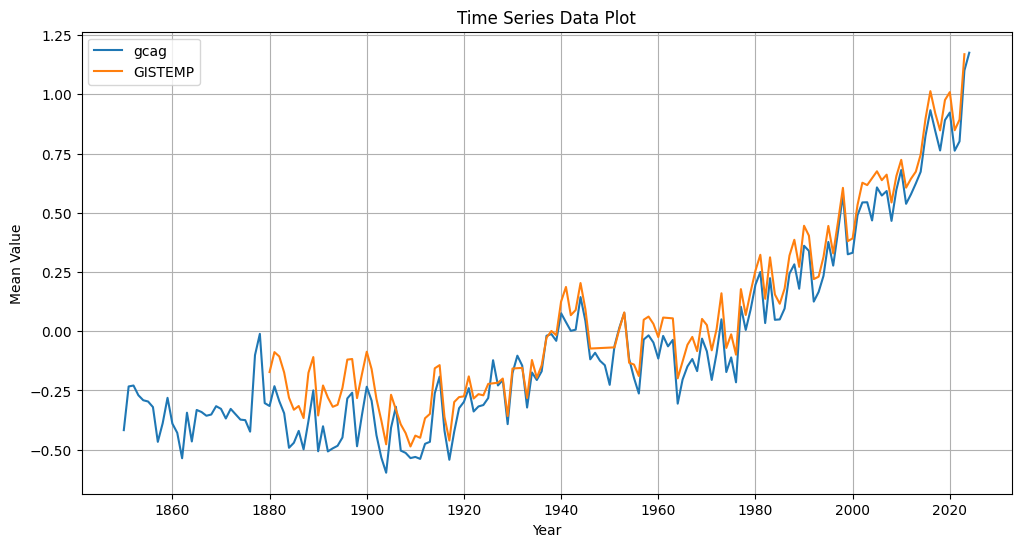

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.impute import SimpleImputer

def load_time_series_data(filepath):
    """Load time series data from a CSV file"""
    df = pd.read_csv(filepath)
    print("Initial Data:\n", df.head())
    return df

def preprocess_time_series(df):
    """Preprocess time series data: handling missing values, converting time formats, and filtering"""
    
    # Convert 'Year' column to datetime format
    df['Year'] = pd.to_datetime(df['Year'], format='%Y')
    df.set_index('Year', inplace=True)
    
    # Handle missing values (impute with mean)
    imputer = SimpleImputer(strategy='mean')
    df['Mean'] = imputer.fit_transform(df[['Mean']])
    
    # Drop duplicate records
    df.drop_duplicates(inplace=True)
    
    print("Preprocessed Data:\n", df.head())
    return df

def plot_time_series(df):
    """Plot time series data"""
    plt.figure(figsize=(12,6))
    for source in df['Source'].unique():
        subset = df[df['Source'] == source]
        plt.plot(subset.index, subset['Mean'], label=source)
    
    plt.xlabel("Year")
    plt.ylabel("Mean Value")
    plt.title("Time Series Data Plot")
    plt.legend()
    plt.grid()
    plt.show()

def main():
    filepath = "C://Users//Jayashrinidhi V//OneDrive//Documents//VScode//TimeSeriesAnalysis//globaltemp.csv"
    df = load_time_series_data(filepath)
    df = preprocess_time_series(df)
    plot_time_series(df)
    
if __name__ == "__main__":
    main()
